# Project goals and scope

The main goal of this project is to explore the relationship between the economical aspect and life expectancy of people for several countries from different continents.

The input data was provided by the Codecademy.com.

## Import data

First of all import some python packages for data handling and visualizations. Then load the data from the file in CSV format and get acquainted with it.

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

med_df = pd.read_csv('all_data.csv')
med_df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [13]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Let's take a closer look at the first two columns ('Country', 'Year') to understand which countries and which time periods are included in this dataset.

In [14]:
med_df['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [15]:
med_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

Thus, we can say that this dataset includes two columns with categorical values and two columns with numerical values. There are no missing values in the dataset and all column types are correctly defined, allowing us to jump right into data visualization.

## One small step before data visualization

The dataset has one column with a too-long name. Rename it for convenience.

In [16]:
med_df.rename(columns={'Life expectancy at birth (years)': 'Life_exp'}, inplace=True)
med_df.head()

,Country,Year,Life_exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Data visualization

The following tasks will be covered by visualization:
- to estimate life expectancy and GDP by country
- to estimate the behavior of life expectancy and GDP over years
- to estimate the relationship between life expectancy and GDP

## Life expectancy and GDP by country

In [66]:
sns.set_style('whitegrid')
sns.set_palette('deep')

Text(0.5, 1.0, 'Life expectancy per country')

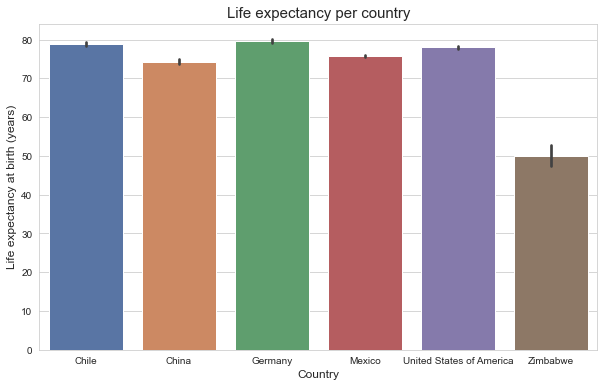

In [67]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=med_df, x='Country', y='Life_exp')
ax.set_ylabel('Life expectancy at birth (years)', fontsize=12)
ax.set_xlabel('Country', fontsize=12)
ax.set_title('Life expectancy per country', fontsize=15)

Text(0.5, 1.0, 'GDP per country')

<Figure size 432x288 with 0 Axes>

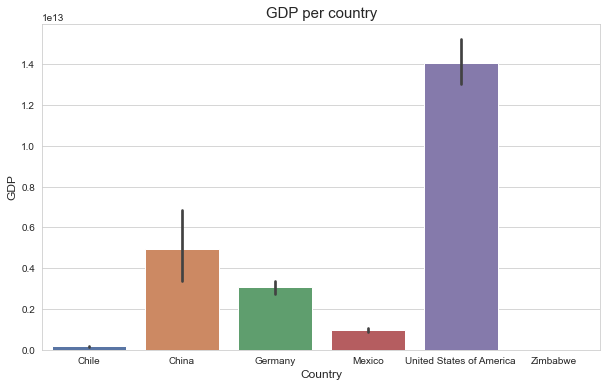

In [68]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=med_df, x='Country', y='GDP')
ax.set_ylabel('GDP', fontsize=12)
ax.set_xlabel('Country', fontsize=12)
ax.set_title('GDP per country', fontsize=15)

As we can see GDP of the USA drastically differ from other countries and interferes with the visualization of values for other countries. Repeat the previous step, but without US data.

Text(0.5, 1.0, 'GDP per country')

<Figure size 432x288 with 0 Axes>

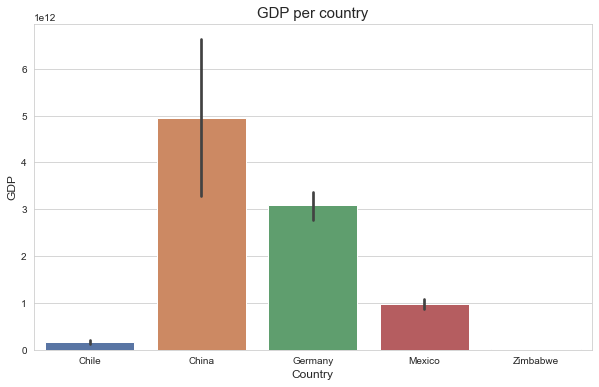

In [69]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=med_df[med_df['Country'] != 'United States of America'], x='Country', y='GDP')
ax.set_ylabel('GDP', fontsize=12)
ax.set_xlabel('Country', fontsize=12)
ax.set_title('GDP per country', fontsize=15)

Slightly better, but a large difference in GDP between countries does not provide an acceptable visualization of GDP data.

We can see that with a markedly different GDP, life expectancy is roughly the same across countries, with the exception of Zimbabwe. Let's move on to plotting the life expectancy on GDP in order to assess this issue in more depth.

## The relationship beetween Life expectancy and GDP

Taking into account the difference in GDP,  we will build plots separately for each country.

<Figure size 432x288 with 0 Axes>

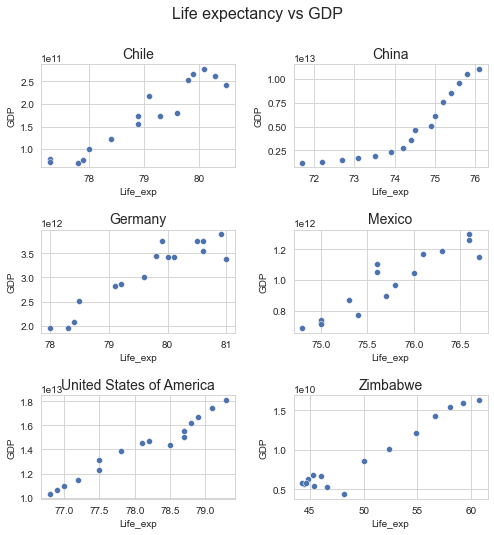

In [94]:
plt.clf()
fig = plt.figure(figsize=(8,8))
fig.suptitle('Life expectancy vs GDP', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.6)

country_lst = list(med_df['Country'].unique())
i = 1
for country in country_lst:
    ax = fig.add_subplot(3, 2, i)
    sns.scatterplot(data = med_df[med_df['Country'] == country], x = 'Life_exp', y = 'GDP')
    ax.set_title(country, fontsize=14)
    i += 1

Based on the graphs, we can conclude that the relationship between life expectancy and GDP is linear. However, it cannot be said that the greater the GDP, the greater the life expectancy. There are some other aspects that affect life expectancy.

## Life expectancy and GDP over years

Stick to the methodology above and use a linear graph.

<Figure size 432x288 with 0 Axes>

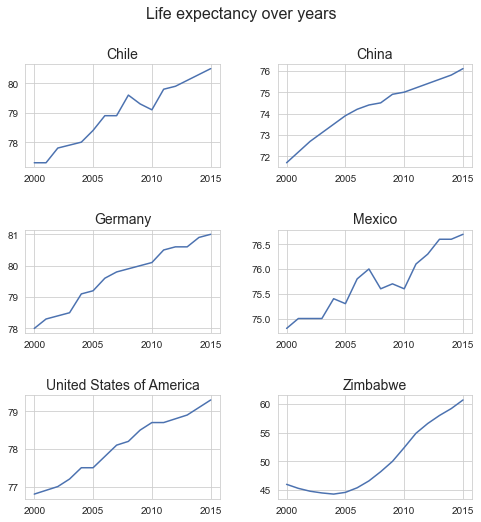

In [97]:
plt.clf()
fig = plt.figure(figsize=(8,8))
fig.suptitle('Life expectancy over years', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.6)

country_lst = list(med_df['Country'].unique())
i = 1
for country in country_lst:
    ax = fig.add_subplot(3, 2, i)
    sns.lineplot(data = med_df[med_df['Country'] == country], x = 'Year', y = 'Life_exp')
    ax.set_title(country, fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    i += 1

<Figure size 432x288 with 0 Axes>

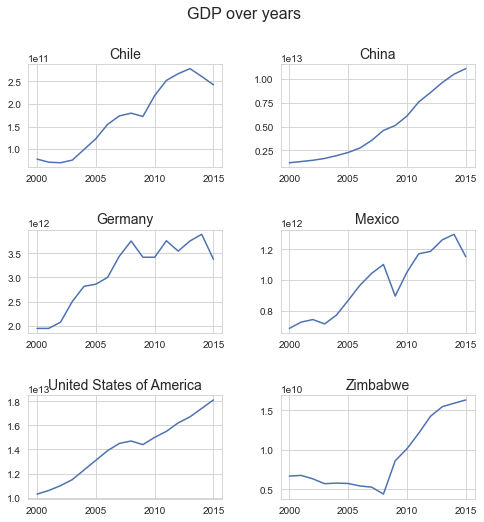

In [95]:
plt.clf()
fig = plt.figure(figsize=(8,8))
fig.suptitle('GDP over years', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.6)

country_lst = list(med_df['Country'].unique())
i = 1
for country in country_lst:
    ax = fig.add_subplot(3, 2, i)
    sns.lineplot(data = med_df[med_df['Country'] == country], x = 'Year', y = 'GDP')
    ax.set_title(country, fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    i += 1

## Conclusions
- The behavior of GDP allows you to track the overall dynamics of life expectancy
- There is no evidence that the higher the GDP, the higher the life expectancy
- There is a certain ceiling on life expectancy, which is no longer affected by further GDP growth
- Obviously, there are a number of other factors that affect life expectancy
- Over the years, life expectancy has a stable but slow growth
- Developing countries show faster growth in life expectancy